In [1]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.0 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-g9_br800
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-g9_br800
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Loading model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


100%|███████████████████████████████████████| 338M/338M [00:15<00:00, 23.0MiB/s]


###UPLOADING IMAGES

In [8]:
from PIL import Image
import os

image = Image.open("/content/pexels-johanna-2151290000-31946876.jpg")
image = Image.open("/content/pexels-raditya-jpg-49217389-20279191.jpg")
image = Image.open("/content/pexels-sicula-d-664882594-31505961.jpg")
image = Image.open("/content/pexels-try-putro-utomo-298755547-13422162.jpg")
image = Image.open("/content/pexels-zmutaqin-13111837.jpg")

image.show()


In [9]:
import os


uploaded_files = os.listdir()
print("Uploaded files:", uploaded_files)


Uploaded files: ['.config', 'pexels-raditya-jpg-49217389-20279191.jpg', 'pexels-sicula-d-664882594-31505961.jpg', 'pexels-try-putro-utomo-298755547-13422162.jpg', 'pexels-johanna-2151290000-31946876.jpg', 'pexels-zmutaqin-13111837.jpg', 'sample_data']


###We start by listing all files in the current working directory and filtering out non-image files

In [12]:
from PIL import Image
import os


uploaded_files = os.listdir()

image_files = [f for f in uploaded_files if os.path.isfile(f) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]


if image_files:
  image = Image.open(image_files[0])
  image.show()
else:
  print("No image files found in the current directory.")

In [13]:
import clip
import torch


device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


image_input = preprocess(image).unsqueeze(0).to(device)


with torch.no_grad():
    image_features = model.encode_image(image_input)


print("Image features shape:", image_features.shape)


Image features shape: torch.Size([1, 512])


###CHECKING SIMILARITY SCORE

In [14]:

captions = [
    "A cat sleeping on a bed.",
    "A pizza on a white plate.",
    "A sunset over the beach."
]


text_tokens = clip.tokenize(captions).to(device)


with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    similarity = (image_features @ text_features.T).softmax(dim=-1)

for i, caption in enumerate(captions):
    print(f"Caption: {caption} - Similarity Score: {similarity[0][i]:.4f}")


Caption: A cat sleeping on a bed. - Similarity Score: 0.2229
Caption: A pizza on a white plate. - Similarity Score: 0.0665
Caption: A sunset over the beach. - Similarity Score: 0.7105


In [16]:
for img_path in uploaded_files:
    if os.path.isfile(img_path) and img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        image = Image.open(img_path)
        image_input = preprocess(image).unsqueeze(0).to(device)

        with torch.no_grad():
            image_features = model.encode_image(image_input)
            similarity = (image_features @ text_features.T).softmax(dim=-1)

        print(f"\nFor image: {img_path}")
        for i, caption in enumerate(captions):
            print(f"Caption: {caption} - Similarity Score: {similarity[0][i]:.4f}")


For image: pexels-raditya-jpg-49217389-20279191.jpg
Caption: A cat sleeping on a bed. - Similarity Score: 0.2229
Caption: A pizza on a white plate. - Similarity Score: 0.0665
Caption: A sunset over the beach. - Similarity Score: 0.7105

For image: pexels-sicula-d-664882594-31505961.jpg
Caption: A cat sleeping on a bed. - Similarity Score: 0.0040
Caption: A pizza on a white plate. - Similarity Score: 0.0842
Caption: A sunset over the beach. - Similarity Score: 0.9117

For image: pexels-try-putro-utomo-298755547-13422162.jpg
Caption: A cat sleeping on a bed. - Similarity Score: 0.0004
Caption: A pizza on a white plate. - Similarity Score: 0.0044
Caption: A sunset over the beach. - Similarity Score: 0.9952

For image: pexels-johanna-2151290000-31946876.jpg
Caption: A cat sleeping on a bed. - Similarity Score: 0.2591
Caption: A pizza on a white plate. - Similarity Score: 0.7131
Caption: A sunset over the beach. - Similarity Score: 0.0278

For image: pexels-zmutaqin-13111837.jpg
Caption: A

In [17]:
from google.colab import files

uploaded = files.upload()


Saving pexels-zmutaqin-13111837.jpg to pexels-zmutaqin-13111837 (1).jpg
Saving pexels-try-putro-utomo-298755547-13422162.jpg to pexels-try-putro-utomo-298755547-13422162 (1).jpg
Saving pexels-sicula-d-664882594-31505961.jpg to pexels-sicula-d-664882594-31505961 (1).jpg
Saving pexels-raditya-jpg-49217389-20279191.jpg to pexels-raditya-jpg-49217389-20279191 (1).jpg
Saving pexels-johanna-2151290000-31946876.jpg to pexels-johanna-2151290000-31946876 (1).jpg


In [18]:
import os

uploaded_files = os.listdir()
print("Uploaded files:", uploaded_files)


Uploaded files: ['.config', 'pexels-raditya-jpg-49217389-20279191.jpg', 'pexels-zmutaqin-13111837 (1).jpg', 'pexels-sicula-d-664882594-31505961.jpg', 'pexels-raditya-jpg-49217389-20279191 (1).jpg', 'pexels-try-putro-utomo-298755547-13422162 (1).jpg', 'pexels-try-putro-utomo-298755547-13422162.jpg', 'pexels-johanna-2151290000-31946876.jpg', 'pexels-sicula-d-664882594-31505961 (1).jpg', 'pexels-zmutaqin-13111837.jpg', 'pexels-johanna-2151290000-31946876 (1).jpg', 'sample_data']


In [19]:
from PIL import Image


for file_name in uploaded_files:
    if file_name.endswith(('jpg', 'jpeg', 'png')):
        image = Image.open(file_name)
        image.show()


In [21]:
import os
from PIL import Image
import clip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


image_files = [f for f in os.listdir() if f.lower().endswith(('.png', '.jpg', '.jpeg'))]


for image_path in image_files:
    image = Image.open(image_path).convert("RGB")
    image_input = preprocess(image).unsqueeze(0).to(device)
    print(f"Successfully processed: {image_path}")


Successfully processed: pexels-raditya-jpg-49217389-20279191.jpg
Successfully processed: pexels-zmutaqin-13111837 (1).jpg
Successfully processed: pexels-sicula-d-664882594-31505961.jpg
Successfully processed: pexels-raditya-jpg-49217389-20279191 (1).jpg
Successfully processed: pexels-try-putro-utomo-298755547-13422162 (1).jpg
Successfully processed: pexels-try-putro-utomo-298755547-13422162.jpg
Successfully processed: pexels-johanna-2151290000-31946876.jpg
Successfully processed: pexels-sicula-d-664882594-31505961 (1).jpg
Successfully processed: pexels-zmutaqin-13111837.jpg
Successfully processed: pexels-johanna-2151290000-31946876 (1).jpg


In [22]:
captions = ["A dog running in the park.", "A person sitting on the beach."]

text_tokens = clip.tokenize(captions).to(device)


In [23]:
with torch.no_grad():
    image_features = model.encode_image(image_input)

    text_features = model.encode_text(text_tokens)


In [24]:
similarity = (image_features @ text_features.T).softmax(dim=-1)

for i, caption in enumerate(captions):
    print(f"Caption: {caption} - Similarity Score: {similarity[0][i]:.4f}")


Caption: A dog running in the park. - Similarity Score: 0.0695
Caption: A person sitting on the beach. - Similarity Score: 0.9305


####We loop through all uploaded images, preprocess each one using CLIP's pipeline, compute image features, and then compare them to caption features using cosine similarity. The best-matching caption is displayed along with the image.

In [25]:

best_caption_index = similarity.argmax()
best_caption = captions[best_caption_index]
print(f"The best matching caption is: {best_caption}")


The best matching caption is: A person sitting on the beach.


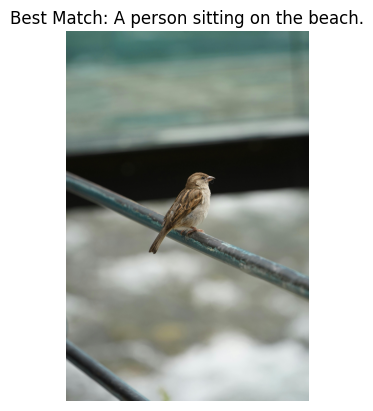

In [26]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(f"Best Match: {best_caption}")
plt.axis('off')
plt.show()


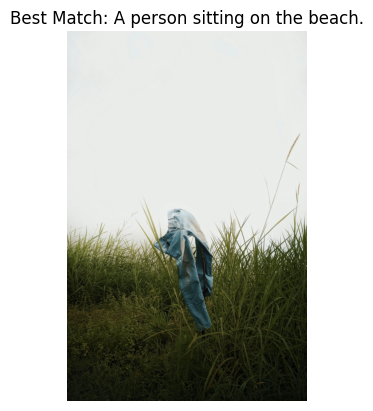

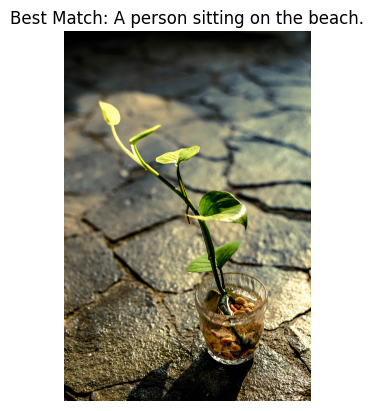

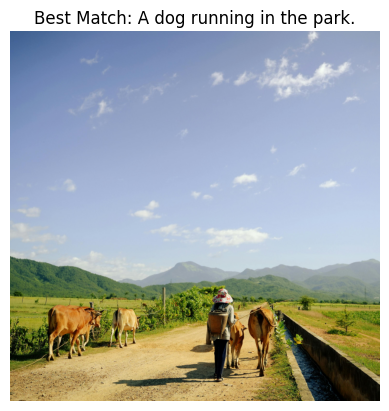

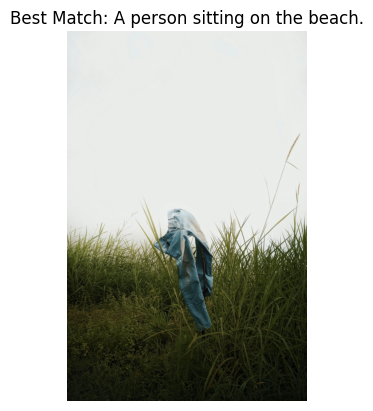

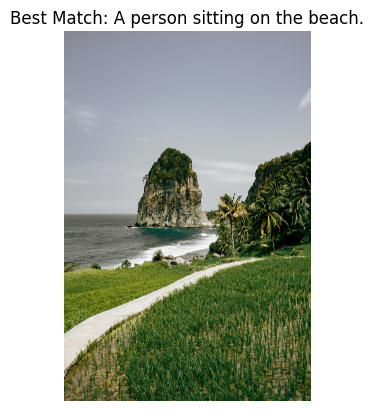

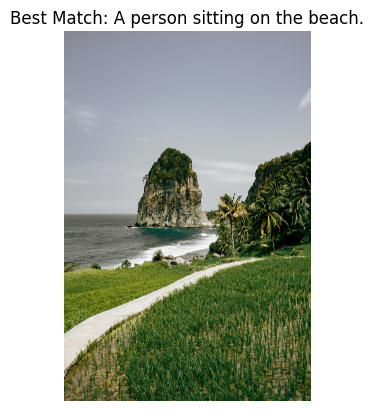

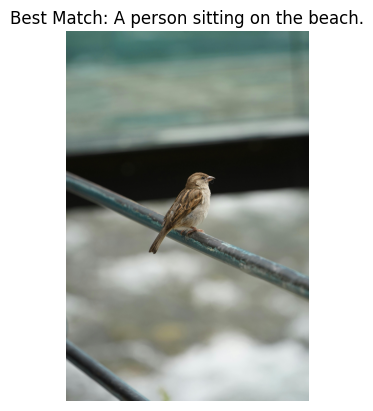

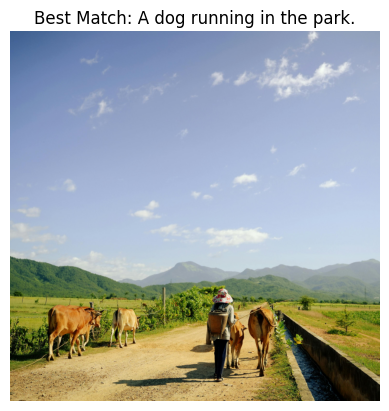

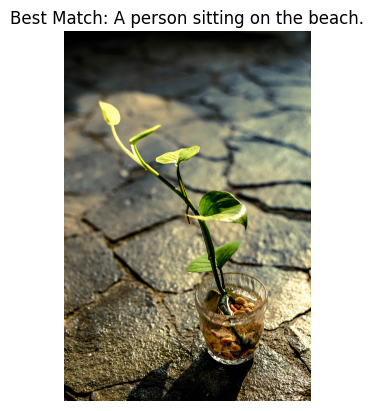

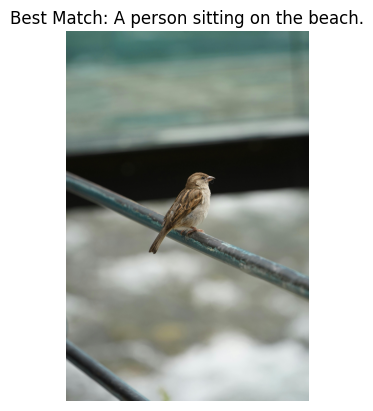

In [27]:

for image_path in uploaded_files:
    if image_path.endswith(('jpg', 'jpeg', 'png')):
        image = Image.open(image_path)
        image_input = preprocess(image).unsqueeze(0).to(device)


        with torch.no_grad():
            image_features = model.encode_image(image_input)


        similarity = (image_features @ text_features.T).softmax(dim=-1)


        best_caption_index = similarity.argmax()
        best_caption = captions[best_caption_index]


        plt.imshow(image)
        plt.title(f"Best Match: {best_caption}")
        plt.axis('off')
        plt.show()
